#SVM

In [ ]:
import numpy as np                     # Llibreria matemÃ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃ©s facilment el dataset digits
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import cross_val_score  
%matplotlib inline
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as  plt
import pandas as pd
import numpy as np
from sklearn.utils.validation import column_or_1d
from sklearn.feature_selection import VarianceThreshold

In [ ]:
from IPython.display import display, HTML

def reportClassesDataframe(report):
    report = [x.split(' ') for x in report.split('\n')]
    header = ['Class Name']+[x for x in report[0] if x!='']
    values = []
    for row in report[1:-5]:
        row = [value for value in row if value!='']
        if row!=[]:
            values.append(row)
    df = pd.DataFrame(data = values, columns = header)
    return df

def reportAccuracyDF(report):
  report = [x.split('      ') for x in report.split('\n')]
  values = []
  report[6].pop(2)
  df = pd.DataFrame(report[6:9])
  return df

def prettyReport(report):
    df = reportClassesDataframe(report)
    df2 = reportAccuracyDF(report)
    display(HTML(df.to_html(index=False,justify="center")))
    print("\n")
    display(HTML(df2.to_html( header=False,index=False,justify="center")))
    df
    df2
    return

In [ ]:
#Read num_rows_to_read first rows
num_rows_to_read = 10000

#Kernel RBF

## Balanced Dataset

In [ ]:
X_b = pd.read_csv("train_values_Prep_ME_Bal.csv",nrows=num_rows_to_read)
y_b = pd.read_csv("train_labels_Prep_Bal.csv",nrows=num_rows_to_read)


y_np_b = y_b.to_numpy()
y_np_b = y_np_b.ravel()

(X_train_b, X_test_b,  y_train_b, y_test_b) = cv.train_test_split(X_b, y_np_b, test_size=.3, stratify = y_b,random_state=1)

In [ ]:
knc = SVC() 
knc.fit(X_train_b, y_train_b)
pred_b=knc.predict(X_test_b)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test_b, pred_b))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test_b, pred_b))
prettyReport(sklearn.metrics.classification_report(y_test_b, pred_b))


Confusion matrix on test set:
 [[424  36 118]
 [169  71 338]
 [ 83  29 466]]

Accuracy on test set:  0.5542099192618224


Class Name,precision,recall,f1-score,support
1,0.63,0.73,0.68,578
2,0.52,0.12,0.20,578
3,0.51,0.81,0.62,578


accuracy,,,0.55,1734
macro avg,0.55,0.55,0.50,1734
weighted avg,0.55,0.55,0.50,1734


###Grid Search

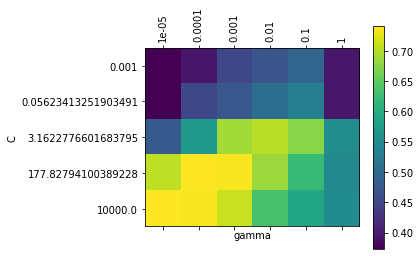


Best combination of parameters found:  {'C': 177.82794100389228, 'gamma': 0.0001}

Acc. 4-fold cross on train data=  0.7413452027695351


In [ ]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.00001, 0.0001,0.001,0.01,0.1,1]
Cs = np.logspace(-3, 1, num=5, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=4)
grid_search.fit(X_train_b,y_train_b)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train_b,  y=y_train_b, cv=4, scoring='accuracy')
print('\nAcc. 4-fold cross on train data= ', cvacc.mean())

In [ ]:
# Let's apply the best combination of parameters found to the test set

knc = SVC(C=parval['C'], gamma=parval['gamma']) 
knc.fit(X_train_b, y_train_b)
pred_b=knc.predict(X_test_b)

print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test_b, pred_b))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test_b, pred_b))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train_b.shape[0])
prettyReport(sklearn.metrics.classification_report(y_test_b, pred_b))

Confusion matrix on test set:
 [[454 115   9]
 [ 76 410  92]
 [ 11 159 408]]

Accuracy on test set:  0.7335640138408305

Number of supports:  2676 ( 3397 of them have slacks)
Prop. of supports:  0.6617210682492581


Class Name,precision,recall,f1-score,support
1,0.84,0.79,0.81,578
2,0.60,0.71,0.65,578
3,0.80,0.71,0.75,578


accuracy,,,0.73,1734
macro avg,0.75,0.73,0.74,1734
weighted avg,0.75,0.73,0.74,1734


## Unbalanced Dataset


In [ ]:
X = pd.read_csv("train_values_Prep_ME.csv",nrows=num_rows_to_read)
y = pd.read_csv("train_labels_Prep.csv",nrows=num_rows_to_read)


y_np = y.to_numpy()
y_np = y_np.ravel()

(X_train, X_test,  y_train, y_test) = cv.train_test_split(X, y_np, test_size=.3, stratify = y,random_state=1)

In [ ]:
knc = SVC() 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)
print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
prettyReport(sklearn.metrics.classification_report(y_test, pred))

Confusion matrix on test set:
 [[   0  287    0]
 [   0 1717    0]
 [   0  996    0]]

Accuracy on test set:  0.5723333333333334


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Class Name,precision,recall,f1-score,support
1,0.00,0.00,0.00,287
2,0.57,1.00,0.73,1717
3,0.00,0.00,0.00,996


accuracy,,,0.57,3000
macro avg,0.19,0.33,0.24,3000
weighted avg,0.33,0.57,0.42,3000


### Grid Search

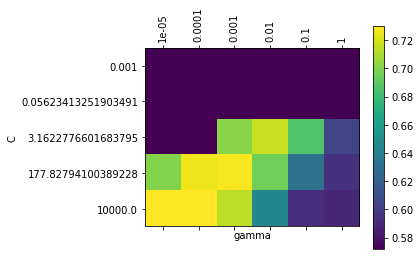


Best combination of parameters found:  {'C': 10000.0, 'gamma': 1e-05}

Acc. 4-fold cross on train data=  0.7302857142857144


In [ ]:
# Values we will test for each parameter. When observin results, consider the limits of the 
# values tested and increase them if necessary 
gammas = [0.00001, 0.0001,0.001,0.01,0.1,1]
Cs = np.logspace(-3, 1, num=5, base=10.0)

param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVC(), param_grid, cv=4)
grid_search.fit(X_train,y_train)
parval=grid_search.best_params_

# We'll show in a grid, the accuracy for each combination of parameters tester
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(param_grid['C']), len(param_grid['gamma']))

plt.matshow(scores)
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(param_grid['gamma'])), param_grid['gamma'],rotation='vertical')
plt.yticks(np.arange(len(param_grid['C'])), param_grid['C'])
plt.show()
parval=grid_search.best_params_
print("\nBest combination of parameters found: ",parval)


cvacc = cross_val_score(SVC(C=parval['C'], gamma=parval['gamma']) , X=X_train,  y=y_train, cv=4, scoring='accuracy')
print('\nAcc. 4-fold cross on train data= ', cvacc.mean())

In [ ]:
# Let's apply the best combination of parameters found to the test set

knc = SVC(C=parval['C'], gamma=parval['gamma']) 
knc.fit(X_train, y_train)
pred=knc.predict(X_test)

print("Confusion matrix on test set:\n",sklearn.metrics.confusion_matrix(y_test, pred))
print("\nAccuracy on test set: ",sklearn.metrics.accuracy_score(y_test, pred))
print("\nNumber of supports: ",np.sum(knc.n_support_), "(",np.sum(np.abs(knc.dual_coef_)==parval['C']) ,"of them have slacks)")
print("Prop. of supports: ",np.sum(knc.n_support_)/X_train.shape[0])
prettyReport(sklearn.metrics.classification_report(y_test, pred))

Confusion matrix on test set:
 [[ 105  177    5]
 [  49 1501  167]
 [   4  384  608]]

Accuracy on test set:  0.738

Number of supports:  4389 ( 4744 of them have slacks)
Prop. of supports:  0.627


Class Name,precision,recall,f1-score,support
1,0.66,0.37,0.47,287
2,0.73,0.87,0.79,1717
3,0.78,0.61,0.68,996


accuracy,,,0.74,3000
macro avg,0.72,0.62,0.65,3000
weighted avg,0.74,0.74,0.73,3000
